# Functional Capstone Project - Data & Analytics



## Business Context

**Infini Telco** is a prominent player in the telco industry with a strong presence in Malaysia. Specializing in B2B sales, they serve as a vital link in the supply chain, facilitating the distribution of telecommunication and technology products to retailers, service providers, and other businesses across the continent. 

Despite their market dominance and expansive product offerings, the company faces critical business challenge related to marketing strategy. A key aspect of this involves the ***identification and segmentation of their customer base into well-defined segments based on discernible patterns in product purchase behaviour and understand their product portfolio.*** By understanding the distinct needs, preferences, and purchasing habits of different customer segments, the client can develop targeted marketing strategies that cater to the specific needs of each segment, enhancing customer satisfaction and loyalty, driving revenue growth.




## Business Challenges

- No streamlined process to handle data and data is only available in chunks
- Limited intel on customer purchase patterns to drive targeted marketing
- Inadequate product insights across different customer groups


## Project Objectives

The business needs your help as a ***data analyst*** to overcome these challenges. Apply your data analytics skillset learnt.



### 1. Data Preprocessing

Data preparation is a critical process first step, involving the gathering, cleaning, transforming, and organizing of raw data into a format suitable for analysis. This step is essential for ensuring the quality and reliability of the insights derived from the data.

Here, the transaction data is provided from June 2020 to December 2022, which are stored across three separate csv files. The dataset are:

- Transactions_1.csv
- Transactions_2.csv
- Transactions_3.csv

***Task 1.1: Combine the transaction data files***

Find a way to combine the above data together into a singular dataframe, that will contain all the transactions at one place. Name this singular dataframe df_Txn_full.

In [ ]:
!pip install numpy==1.24.3

In [ ]:
import numpy as np
print(np.__version__)


In [ ]:
#Import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import warnings
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
warnings.filterwarnings("ignore")

pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_rows = 100

In [2]:
# Reading three CSV files into pandas DataFrames
df1 = pd.read_csv("Transactions_1.csv")
df2 = pd.read_csv("Transactions_2.csv")
df3 = pd.read_csv("Transactions_3.csv")

In [3]:
# Concatenating three DataFrames (df1, df2, and df3) into a single DataFrame
df_Txn_full = pd.concat([df1, df2, df3], ignore_index=True)

In [4]:
df_Txn_full

,INDEX,INVOICE_NUMBER,INVOICE_ITEM,DOCUMENT_DATE,CUSTOMER_NUMBER,Main_account,Main_account_name,Main_resposible_employee_name,PRODUCT,Position_type_order_line,GROSS_TURNOVER,AMOUNT
0,33806,124289578,10,2022-10-01,14816,14816,Customer Group_0,Responsible Employee_0,000000000000100095,ZSV,0.00,1
1,65627,124317609,230,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,000000000000100095,ZSV,0.00,1
2,65628,124317609,250,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,000000000000100095,ZSV,0.00,0
3,65629,124317609,270,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,000000000000100095,ZSV,0.00,1
4,65630,124317609,290,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,000000000000100095,ZSV,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1353666,1348783,123561680,240,2022-05-02,994332,994332,Customer Group_4555,Responsible Employee_48,000000007857002746,ZKSK,207336.00,50
1353667,1348830,123700628,310,2022-05-02,994332,994332,Customer Group_4555,Responsible Employee_48,000000010001166712,ZSKA,2512.93,1
1353668,1348878,124470380,230,2022-10-10,994332,994332,Customer Group_4555,Responsible Employee_48,000000010000836860,ZSKA,22910.00,1580
1353669,1349192,123461909,300,2022-05-02,994332,994332,Customer Group_4555,Responsible Employee_48,000000010000467409,ZSKA,16.71,1


**Validation checkpoints:**
Consider, you would have received some information from the business on:

- Gross Annual Turnover for this period to be ~$1.4B
- The total unique products are ~190000
- The total customer base is ~7k

***Task 1.1.1***:

Use the above information to validate the data creation process. This is to ensure that no records of data are lost in the process. 

In [5]:
import pandas as pd

# Compute actual values from df_Txn_full
actual_gross_turnover = df_Txn_full["GROSS_TURNOVER"].sum()
actual_unique_products = df_Txn_full["PRODUCT"].nunique()
actual_unique_customers = df_Txn_full["CUSTOMER_NUMBER"].nunique()

# Print the results
print(f"Gross Annual Turnover: ${actual_gross_turnover:,.2f}")
print(f"Total Unique Products: {actual_unique_products}")
print(f"Total Customer Base: {actual_unique_customers}")

Gross Annual Turnover: $1,466,478,196.72
Total Unique Products: 191394
Total Customer Base: 7130


***Task 1.2: Join the mapping files to the transaction data***


Mapping files contain supplementary detailed information that will be used for our analysis. 
Use these mapping files to join with the above transaction data to create the master dataset <br><br>
**List of mapping files and their primary keys:**<br>
1. Customer Characteristics : to be joined on Customer Number
2. Customer Type Mapping : to be joined on Main Account ID
3. Product Category Mapping : to be joined on Product ID

To ensure that the joins are performed accurately, it is a good practice to clean up the columns upon which the join is performed. 
Some recommended steps to clean up a column are:

- ensuring the values are of the same data type
- removing leading zeroes
- removing leading and trailing whitespaces etc.


***Task 1.2.1:***

Here, before, performing the joins, you have to perform an intermediary step to clean up the below columns based on the above recommended steps:

- customer_number
- Product
- Main_account
- Invoice_Number

*Hint: Check for any leading or trailing 0s or white spaces.*

In [6]:
import pandas as pd

# Convert columns to string type to ensure uniform
columns_to_clean = ["CUSTOMER_NUMBER", "PRODUCT", "Main_account", "INVOICE_NUMBER"]
df_Txn_full[columns_to_clean] = df_Txn_full[columns_to_clean].astype(str)

# Remove leading and trailing whitespaces
df_Txn_full[columns_to_clean] = df_Txn_full[columns_to_clean].apply(lambda x: x.str.strip())

# Remove leading zeros where applicable
df_Txn_full["CUSTOMER_NUMBER"] = df_Txn_full["CUSTOMER_NUMBER"].str.lstrip("0")
df_Txn_full["PRODUCT"] = df_Txn_full["PRODUCT"].str.lstrip("0")
df_Txn_full["Main_account"] = df_Txn_full["Main_account"].str.lstrip("0")
df_Txn_full["INVOICE_NUMBER"] = df_Txn_full["INVOICE_NUMBER"].str.lstrip("0")

In [7]:
df_Txn_full.dtypes

INDEX                              int64
INVOICE_NUMBER                    object
INVOICE_ITEM                       int64
DOCUMENT_DATE                     object
CUSTOMER_NUMBER                   object
Main_account                      object
Main_account_name                 object
Main_resposible_employee_name     object
PRODUCT                           object
Position_type_order_line          object
GROSS_TURNOVER                   float64
AMOUNT                             int64
dtype: object

In [8]:
df_Txn_full

,INDEX,INVOICE_NUMBER,INVOICE_ITEM,DOCUMENT_DATE,CUSTOMER_NUMBER,Main_account,Main_account_name,Main_resposible_employee_name,PRODUCT,Position_type_order_line,GROSS_TURNOVER,AMOUNT
0,33806,124289578,10,2022-10-01,14816,14816,Customer Group_0,Responsible Employee_0,100095,ZSV,0.00,1
1,65627,124317609,230,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,100095,ZSV,0.00,1
2,65628,124317609,250,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,100095,ZSV,0.00,0
3,65629,124317609,270,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,100095,ZSV,0.00,1
4,65630,124317609,290,2022-10-01,17566,17566,Customer Group_1,Responsible Employee_1,100095,ZSV,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1353666,1348783,123561680,240,2022-05-02,994332,994332,Customer Group_4555,Responsible Employee_48,7857002746,ZKSK,207336.00,50
1353667,1348830,123700628,310,2022-05-02,994332,994332,Customer Group_4555,Responsible Employee_48,10001166712,ZSKA,2512.93,1
1353668,1348878,124470380,230,2022-10-10,994332,994332,Customer Group_4555,Responsible Employee_48,10000836860,ZSKA,22910.00,1580
1353669,1349192,123461909,300,2022-05-02,994332,994332,Customer Group_4555,Responsible Employee_48,10000467409,ZSKA,16.71,1


In [9]:
df_Txn_full["CUSTOMER_NUMBER"] = df_Txn_full["CUSTOMER_NUMBER"].astype("int64")

In [10]:
df_Txn_full.dtypes

INDEX                              int64
INVOICE_NUMBER                    object
INVOICE_ITEM                       int64
DOCUMENT_DATE                     object
CUSTOMER_NUMBER                    int64
Main_account                      object
Main_account_name                 object
Main_resposible_employee_name     object
PRODUCT                           object
Position_type_order_line          object
GROSS_TURNOVER                   float64
AMOUNT                             int64
dtype: object

***Task 1.2.2:***

Import the mapping files and rename the dataframe:

- Customer Characteristics.csv : df_CustChar
- Customer Type Mapping.csv : df_CustType
- Product Categories.csv : df_ProdCategories

In [11]:
df_CustChar = pd.read_csv("Customer Characteristics.csv")
df_CustType = pd.read_csv("Customer Type Mapping.csv")
df_ProdCategories = pd.read_csv("Product Categories.csv", encoding='ISO-8859-1')

***Task 1.2.3:***

To perform join on the dataframes, it is important to clean the columns to ensure that the columns are free from any special characters.

- Remove any leading or trailing 0s in Customer_Number column in the df_CustChar dataframe.
- Check for duplicates in the data and remove any duplicates.
- Create a master dataframe by performing appropriate join on df_CustChar dataframe and df_Txn_full dataframe. Rename the master dataframe as df_Master.



In [12]:
df_CustChar

,CUSTOMER_NAME,CUSTOMER_NUMBER,ACCOUNT_GROUP_TXT,CVR_Company_status
0,CUSTOMER_NAME_0,35016,Debtors,Normal
1,CUSTOMER_NAME_1,38336,Debtors,Normal
2,CUSTOMER_NAME_2,38438,Debtors,Normal
3,CUSTOMER_NAME_3,45001,Debtors,Normal
4,CUSTOMER_NAME_2,45005,Debtors,Normal
...,...,...,...,...
7125,CUSTOMER_NAME_596,93441,Debtors,NaN
7126,CUSTOMER_NAME_789,93938,Debtors,Normal
7127,CUSTOMER_NAME_6025,94376,Debtors,Normal
7128,CUSTOMER_NAME_6026,94399,Debtors,NaN


In [13]:
df_CustChar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7130 entries, 0 to 7129
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CUSTOMER_NAME       7130 non-null   object
 1   CUSTOMER_NUMBER     7130 non-null   int64 
 2   ACCOUNT_GROUP_TXT   7130 non-null   object
 3   CVR_Company_status  6813 non-null   object
dtypes: int64(1), object(3)
memory usage: 222.9+ KB


In [14]:
import pandas as pd

# Step 1: Remove leading and trailing zeros from Customer_Number column
df_CustChar["CUSTOMER_NUMBER"] = df_CustChar["CUSTOMER_NUMBER"].astype(str).str.lstrip("0")
df_CustChar["CUSTOMER_NUMBER"] = df_CustChar["CUSTOMER_NUMBER"].astype("int64")

In [15]:
# Step 2: Remove duplicates from df_CustChar
df_CustChar = df_CustChar.drop_duplicates()

In [16]:
df_CustChar .dtypes

CUSTOMER_NAME         object
CUSTOMER_NUMBER        int64
ACCOUNT_GROUP_TXT     object
CVR_Company_status    object
dtype: object

In [17]:
# Step 3: Create a master dataframe by performing an appropriate join
df_Master = df_CustChar.merge(df_Txn_full, on="CUSTOMER_NUMBER", how="right")

In [18]:
df_Master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353671 entries, 0 to 1353670
Data columns (total 15 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   CUSTOMER_NAME                  1353671 non-null  object 
 1   CUSTOMER_NUMBER                1353671 non-null  int64  
 2   ACCOUNT_GROUP_TXT              1353671 non-null  object 
 3   CVR_Company_status             1269541 non-null  object 
 4   INDEX                          1353671 non-null  int64  
 5   INVOICE_NUMBER                 1353671 non-null  object 
 6   INVOICE_ITEM                   1353671 non-null  int64  
 7   DOCUMENT_DATE                  1353671 non-null  object 
 8   Main_account                   1353671 non-null  object 
 9   Main_account_name              1353671 non-null  object 
 10  Main_resposible_employee_name  1353671 non-null  object 
 11  PRODUCT                        1353671 non-null  object 
 12  Position_type_

In [19]:
df_Master

,CUSTOMER_NAME,CUSTOMER_NUMBER,ACCOUNT_GROUP_TXT,CVR_Company_status,INDEX,INVOICE_NUMBER,INVOICE_ITEM,DOCUMENT_DATE,Main_account,Main_account_name,Main_resposible_employee_name,PRODUCT,Position_type_order_line,GROSS_TURNOVER,AMOUNT
0,CUSTOMER_NAME_1429,14816,Debtors,Normal,33806,124289578,10,2022-10-01,14816,Customer Group_0,Responsible Employee_0,100095,ZSV,0.00,1
1,CUSTOMER_NAME_573,17566,Debtors,Normal,65627,124317609,230,2022-10-01,17566,Customer Group_1,Responsible Employee_1,100095,ZSV,0.00,1
2,CUSTOMER_NAME_573,17566,Debtors,Normal,65628,124317609,250,2022-10-01,17566,Customer Group_1,Responsible Employee_1,100095,ZSV,0.00,0
3,CUSTOMER_NAME_573,17566,Debtors,Normal,65629,124317609,270,2022-10-01,17566,Customer Group_1,Responsible Employee_1,100095,ZSV,0.00,1
4,CUSTOMER_NAME_573,17566,Debtors,Normal,65630,124317609,290,2022-10-01,17566,Customer Group_1,Responsible Employee_1,100095,ZSV,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353666,CUSTOMER_NAME_2543,994332,Debtors,Normal,1348783,123561680,240,2022-05-02,994332,Customer Group_4555,Responsible Employee_48,7857002746,ZKSK,207336.00,50
1353667,CUSTOMER_NAME_2543,994332,Debtors,Normal,1348830,123700628,310,2022-05-02,994332,Customer Group_4555,Responsible Employee_48,10001166712,ZSKA,2512.93,1
1353668,CUSTOMER_NAME_2543,994332,Debtors,Normal,1348878,124470380,230,2022-10-10,994332,Customer Group_4555,Responsible Employee_48,10000836860,ZSKA,22910.00,1580
1353669,CUSTOMER_NAME_2543,994332,Debtors,Normal,1349192,123461909,300,2022-05-02,994332,Customer Group_4555,Responsible Employee_48,10000467409,ZSKA,16.71,1


***Task 1.2.4:***

There is a data validation check point here. This is to ensure that you have not lost any data in the data preparation step.
Check and validate:

- Gross Annual Turnover is ~$1.4B
- The total customer base is ~7k

In [20]:
import pandas as pd

# Compute actual values from df_Txn_full
actual_gross_turnover = df_Master["GROSS_TURNOVER"].sum()
actual_unique_customers = df_Master["CUSTOMER_NUMBER"].nunique()

# Print the results
print(f"Gross Annual Turnover: ${actual_gross_turnover:,.2f}")
print(f"Total Customer Base: {actual_unique_customers}")


Gross Annual Turnover: $1,466,478,196.72
Total Customer Base: 7130


***Task 1.2.5:***

Now, you will be joining the df_CustType dataframe with the master dataframe.

- Remove any leading or trailing 0s in Main_account_ID column in the df_CustType dataframe.
- Check for duplicates in the data and remove any duplicates.
- Perform appropriate join on df_CustType dataframe and df_Master dataframe and save this merged dataframe as df_Master.

In [21]:
df_CustType

,Main_account_ID,Customer_type
0,10014,A-B
1,10025,A-B
2,10033,A-B
3,10048,D
4,10056,C
...,...,...
6850,999616,NaN
6851,999838,NaN
6852,999850,C
6853,999906,D


In [22]:
import pandas as pd

# Step 1: Remove leading and trailing zeros from Customer_Number column
df_CustType["Main_account_ID"] = df_CustType["Main_account_ID"].astype(str).str.lstrip("0")
df_CustType["Main_account_ID"] = df_CustType["Main_account_ID"].astype("int64")

In [23]:
#Step 2 : Remove duplicate data
df_CustType = df_CustType.drop_duplicates()

In [24]:
# Step 3: Rename 'main_account_ID' to 'main_account'
df_CustType.rename(columns={'Main_account_ID': 'Main_account'}, inplace=True)

In [25]:
df_CustType.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6855 entries, 0 to 6854
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Main_account   6855 non-null   int64 
 1   Customer_type  4555 non-null   object
dtypes: int64(1), object(1)
memory usage: 107.2+ KB


In [26]:
df_Master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353671 entries, 0 to 1353670
Data columns (total 15 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   CUSTOMER_NAME                  1353671 non-null  object 
 1   CUSTOMER_NUMBER                1353671 non-null  int64  
 2   ACCOUNT_GROUP_TXT              1353671 non-null  object 
 3   CVR_Company_status             1269541 non-null  object 
 4   INDEX                          1353671 non-null  int64  
 5   INVOICE_NUMBER                 1353671 non-null  object 
 6   INVOICE_ITEM                   1353671 non-null  int64  
 7   DOCUMENT_DATE                  1353671 non-null  object 
 8   Main_account                   1353671 non-null  object 
 9   Main_account_name              1353671 non-null  object 
 10  Main_resposible_employee_name  1353671 non-null  object 
 11  PRODUCT                        1353671 non-null  object 
 12  Position_type_

In [27]:
df_Master["Main_account"] = df_Master["Main_account"].astype("int64")

In [28]:
df_Master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353671 entries, 0 to 1353670
Data columns (total 15 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   CUSTOMER_NAME                  1353671 non-null  object 
 1   CUSTOMER_NUMBER                1353671 non-null  int64  
 2   ACCOUNT_GROUP_TXT              1353671 non-null  object 
 3   CVR_Company_status             1269541 non-null  object 
 4   INDEX                          1353671 non-null  int64  
 5   INVOICE_NUMBER                 1353671 non-null  object 
 6   INVOICE_ITEM                   1353671 non-null  int64  
 7   DOCUMENT_DATE                  1353671 non-null  object 
 8   Main_account                   1353671 non-null  int64  
 9   Main_account_name              1353671 non-null  object 
 10  Main_resposible_employee_name  1353671 non-null  object 
 11  PRODUCT                        1353671 non-null  object 
 12  Position_type_

In [29]:
# Step 4: Create a master dataframe by performing an appropriate join
df_Master = df_CustType.merge(df_Master, on="Main_account", how="right")

In [30]:
df_Master

,Main_account,Customer_type,CUSTOMER_NAME,CUSTOMER_NUMBER,ACCOUNT_GROUP_TXT,CVR_Company_status,INDEX,INVOICE_NUMBER,INVOICE_ITEM,DOCUMENT_DATE,Main_account_name,Main_resposible_employee_name,PRODUCT,Position_type_order_line,GROSS_TURNOVER,AMOUNT
0,14816,KAM,CUSTOMER_NAME_1429,14816,Debtors,Normal,33806,124289578,10,2022-10-01,Customer Group_0,Responsible Employee_0,100095,ZSV,0.00,1
1,17566,A-B,CUSTOMER_NAME_573,17566,Debtors,Normal,65627,124317609,230,2022-10-01,Customer Group_1,Responsible Employee_1,100095,ZSV,0.00,1
2,17566,A-B,CUSTOMER_NAME_573,17566,Debtors,Normal,65628,124317609,250,2022-10-01,Customer Group_1,Responsible Employee_1,100095,ZSV,0.00,0
3,17566,A-B,CUSTOMER_NAME_573,17566,Debtors,Normal,65629,124317609,270,2022-10-01,Customer Group_1,Responsible Employee_1,100095,ZSV,0.00,1
4,17566,A-B,CUSTOMER_NAME_573,17566,Debtors,Normal,65630,124317609,290,2022-10-01,Customer Group_1,Responsible Employee_1,100095,ZSV,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353666,994332,A-B,CUSTOMER_NAME_2543,994332,Debtors,Normal,1348783,123561680,240,2022-05-02,Customer Group_4555,Responsible Employee_48,7857002746,ZKSK,207336.00,50
1353667,994332,A-B,CUSTOMER_NAME_2543,994332,Debtors,Normal,1348830,123700628,310,2022-05-02,Customer Group_4555,Responsible Employee_48,10001166712,ZSKA,2512.93,1
1353668,994332,A-B,CUSTOMER_NAME_2543,994332,Debtors,Normal,1348878,124470380,230,2022-10-10,Customer Group_4555,Responsible Employee_48,10000836860,ZSKA,22910.00,1580
1353669,994332,A-B,CUSTOMER_NAME_2543,994332,Debtors,Normal,1349192,123461909,300,2022-05-02,Customer Group_4555,Responsible Employee_48,10000467409,ZSKA,16.71,1


***Task 1.2.6:***

There is a data validation check point here. This is to ensure that you have not lost any data in the data preparation step.
Check and validate:

- Gross Annual Turnover is ~$1.4B
- The total customer base is ~7k

In [31]:
import pandas as pd

# Compute actual values from df_Txn_full
actual_gross_turnover = df_Master["GROSS_TURNOVER"].sum()
actual_unique_customers = df_Master["CUSTOMER_NUMBER"].nunique()

# Print the results
print(f"Gross Annual Turnover: ${actual_gross_turnover:,.2f}")
print(f"Total Customer Base: {actual_unique_customers}")


Gross Annual Turnover: $1,466,478,196.72
Total Customer Base: 7130


***Task 1.2.7:***

Now, you will be joining the df_ProdCategories dataframe with the master dataframe.

- Remove any leading or trailing 0s in ProductID column in the df_ProdCategories dataframe.
- Check for duplicates in the data and remove any duplicates.
- Perform appropriate join on df_ProdCategories dataframe and df_Master dataframe and save this merged dataframe as df_Master.

In [32]:
df_ProdCategories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210028 entries, 0 to 210027
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ProductID          210028 non-null  object
 1   ProductCategoryID  210028 non-null  int64 
 2   ProdCat2           210028 non-null  object
 3   ProdCat1           210028 non-null  object
dtypes: int64(1), object(3)
memory usage: 6.4+ MB


In [33]:
df_Master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353671 entries, 0 to 1353670
Data columns (total 16 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   Main_account                   1353671 non-null  int64  
 1   Customer_type                  1336015 non-null  object 
 2   CUSTOMER_NAME                  1353671 non-null  object 
 3   CUSTOMER_NUMBER                1353671 non-null  int64  
 4   ACCOUNT_GROUP_TXT              1353671 non-null  object 
 5   CVR_Company_status             1269541 non-null  object 
 6   INDEX                          1353671 non-null  int64  
 7   INVOICE_NUMBER                 1353671 non-null  object 
 8   INVOICE_ITEM                   1353671 non-null  int64  
 9   DOCUMENT_DATE                  1353671 non-null  object 
 10  Main_account_name              1353671 non-null  object 
 11  Main_resposible_employee_name  1353671 non-null  object 
 12  PRODUCT       

In [34]:
import pandas as pd

# Step 1: Remove leading and trailing zeros from Customer_Number column
df_ProdCategories['ProductID'] = df_ProdCategories['ProductID'].astype(str).str.lstrip("0")

In [35]:
df_ProdCategories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210028 entries, 0 to 210027
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ProductID          210028 non-null  object
 1   ProductCategoryID  210028 non-null  int64 
 2   ProdCat2           210028 non-null  object
 3   ProdCat1           210028 non-null  object
dtypes: int64(1), object(3)
memory usage: 6.4+ MB


In [36]:
# Step 2: Remove duplicates from df_CustChar
df_ProdCategories = df_ProdCategories.drop_duplicates()

In [37]:
# Step 3: Rename 'PRODUCT' to 'ProductID'
df_Master.rename(columns={'PRODUCT': 'ProductID'}, inplace=True)

In [38]:
df_Master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353671 entries, 0 to 1353670
Data columns (total 16 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   Main_account                   1353671 non-null  int64  
 1   Customer_type                  1336015 non-null  object 
 2   CUSTOMER_NAME                  1353671 non-null  object 
 3   CUSTOMER_NUMBER                1353671 non-null  int64  
 4   ACCOUNT_GROUP_TXT              1353671 non-null  object 
 5   CVR_Company_status             1269541 non-null  object 
 6   INDEX                          1353671 non-null  int64  
 7   INVOICE_NUMBER                 1353671 non-null  object 
 8   INVOICE_ITEM                   1353671 non-null  int64  
 9   DOCUMENT_DATE                  1353671 non-null  object 
 10  Main_account_name              1353671 non-null  object 
 11  Main_resposible_employee_name  1353671 non-null  object 
 12  ProductID     

In [39]:
#Step 4: Joining the dataframe
df_Master = df_ProdCategories.merge(df_Master, on="ProductID", how="right")

In [40]:
df_Master

,ProductID,ProductCategoryID,ProdCat2,ProdCat1,Main_account,Customer_type,CUSTOMER_NAME,CUSTOMER_NUMBER,ACCOUNT_GROUP_TXT,CVR_Company_status,INDEX,INVOICE_NUMBER,INVOICE_ITEM,DOCUMENT_DATE,Main_account_name,Main_resposible_employee_name,Position_type_order_line,GROSS_TURNOVER,AMOUNT
0,100095,8.00,Music Streaming Services,Television and Entertainment,14816,KAM,CUSTOMER_NAME_1429,14816,Debtors,Normal,33806,124289578,10,2022-10-01,Customer Group_0,Responsible Employee_0,ZSV,0.00,1
1,100095,8.00,Music Streaming Services,Television and Entertainment,17566,A-B,CUSTOMER_NAME_573,17566,Debtors,Normal,65627,124317609,230,2022-10-01,Customer Group_1,Responsible Employee_1,ZSV,0.00,1
2,100095,8.00,Music Streaming Services,Television and Entertainment,17566,A-B,CUSTOMER_NAME_573,17566,Debtors,Normal,65628,124317609,250,2022-10-01,Customer Group_1,Responsible Employee_1,ZSV,0.00,0
3,100095,8.00,Music Streaming Services,Television and Entertainment,17566,A-B,CUSTOMER_NAME_573,17566,Debtors,Normal,65629,124317609,270,2022-10-01,Customer Group_1,Responsible Employee_1,ZSV,0.00,1
4,100095,8.00,Music Streaming Services,Television and Entertainment,17566,A-B,CUSTOMER_NAME_573,17566,Debtors,Normal,65630,124317609,290,2022-10-01,Customer Group_1,Responsible Employee_1,ZSV,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353666,7857002746,563.00,Cybersecurity Solutions,Security and Privacy,994332,A-B,CUSTOMER_NAME_2543,994332,Debtors,Normal,1348783,123561680,240,2022-05-02,Customer Group_4555,Responsible Employee_48,ZKSK,207336.00,50
1353667,10001166712,260.00,Data Add-Ons,Mobile Services,994332,A-B,CUSTOMER_NAME_2543,994332,Debtors,Normal,1348830,123700628,310,2022-05-02,Customer Group_4555,Responsible Employee_48,ZSKA,2512.93,1
1353668,10000836860,634.00,Shopping Cart Solutions,E-commerce Solutions,994332,A-B,CUSTOMER_NAME_2543,994332,Debtors,Normal,1348878,124470380,230,2022-10-10,Customer Group_4555,Responsible Employee_48,ZSKA,22910.00,1580
1353669,10000467409,600.00,Wholesale Telecom Services,Network and Infrastructure,994332,A-B,CUSTOMER_NAME_2543,994332,Debtors,Normal,1349192,123461909,300,2022-05-02,Customer Group_4555,Responsible Employee_48,ZSKA,16.71,1


***Task 1.2.8:***

There is a data validation check point here. This is to ensure that you have not lost any data in the data preparation step.
Check and validate:

- Gross Annual Turnover is ~$1.4B
- The total customer base is ~7k
- The total product is ~15k

In [41]:
import pandas as pd

# Compute actual values from df_Txn_full
actual_gross_turnover = df_Master["GROSS_TURNOVER"].sum()
actual_unique_products = df_Master["ProductID"].nunique()
actual_unique_customers = df_Master["CUSTOMER_NUMBER"].nunique()

# Print the results
print(f"Gross Annual Turnover: ${actual_gross_turnover:,.2f}")
print(f"Total Unique Products: {actual_unique_products}")
print(f"Total Customer Base: {actual_unique_customers}")


Gross Annual Turnover: $1,466,478,196.72
Total Unique Products: 150545
Total Customer Base: 7130


***Task 1.3: Data Cleaning***

A major part of data pre processing involves cleaning the data, removing nulls, filtering out irrelavant or less useful information. For example:

- Remove rows with missing product id
- Removing rows with negative or zero turnover
- Removing customers who interacted very less 

As part of Data Cleaning of this dataset you are required to perform the following:

***Task 1.3.1: In the df_Master data, add a column Invoice_flag, reflecting 0 if number of transactions <= 3, otherwise 1***

This is to flag customers who purchase less frequently

In [42]:
# Count the number of unique INVOICE_NUMBER per CUSTOMER_NUMBER
freq_counts = df_Master.groupby('CUSTOMER_NUMBER')['INVOICE_NUMBER'].nunique()

# Add the Invoice_flag column
df_Master['Invoice_flag'] = df_Master['CUSTOMER_NUMBER'].map(lambda x: 0 if freq_counts[x] <= 3 else 1)


In [43]:
# Filter df_Master to show only rows where Invoice_flag is 1
df_flagged_customers = df_Master[df_Master['Invoice_flag'] == 1]

# Count the number of unique CUSTOMER_NUMBER with Invoice_flag = 1
num_customers_with_flag_1 = df_flagged_customers['CUSTOMER_NUMBER'].nunique()

# Print the count of unique CUSTOMER_NUMBER where Invoice_flag = 1
print(f"Number of unique customers with Invoice_flag = 1: {num_customers_with_flag_1}")


Number of unique customers with Invoice_flag = 1: 4903


***Task 1.3.2: In the df_Master data, add a column Invoice_flag, reflecting 0 if number of transactions <= 3, otherwise 1***

This is to flag customers who purchase single SKU.

In [44]:
import pandas as pd

# Count the number of unique ProductID per CUSTOMER_NUMBER
customer_sku_counts = df_Master.groupby('CUSTOMER_NUMBER')['ProductID'].nunique()

# Map the counts to a new column and apply the flag condition for customers with only 1 unique ProductID
df_Master['SKU_flag'] = df_Master['CUSTOMER_NUMBER'].map(lambda x: 1 if customer_sku_counts[x] > 1 else 0)

In [45]:
# Filter df_Master to show only rows where SKU_flag is 1
df_SKUflagged_customers = df_Master[df_Master['SKU_flag'] == 1]

# Count the number of unique CUSTOMER_NUMBER with SKU_flag is 1
num_customers_with_flag_2 = df_SKUflagged_customers['CUSTOMER_NUMBER'].nunique()

# Print the count of unique CUSTOMER_NUMBER where SKU_flag = 1
print(f"Number of unique customers with SKU_flag = 1: {num_customers_with_flag_2}")


Number of unique customers with SKU_flag = 1: 6288


There are a few records in the dataset whose Product ID are null. These records won't map to product information from the mapping file and hence these records will not be useful for the analysis.

***Task 1.3.3: In the master data, remove records where Product ID is null and save it in a dataframe df_Filtered***

In [46]:
# Remove records where ProductID is null
df_Filtered = df_Master.dropna(subset=['ProductID'])

In [47]:
df_Filtered

,ProductID,ProductCategoryID,ProdCat2,ProdCat1,Main_account,Customer_type,CUSTOMER_NAME,CUSTOMER_NUMBER,ACCOUNT_GROUP_TXT,CVR_Company_status,...,INVOICE_NUMBER,INVOICE_ITEM,DOCUMENT_DATE,Main_account_name,Main_resposible_employee_name,Position_type_order_line,GROSS_TURNOVER,AMOUNT,Invoice_flag,SKU_flag
0,100095,8.00,Music Streaming Services,Television and Entertainment,14816,KAM,CUSTOMER_NAME_1429,14816,Debtors,Normal,...,124289578,10,2022-10-01,Customer Group_0,Responsible Employee_0,ZSV,0.00,1,1,1
1,100095,8.00,Music Streaming Services,Television and Entertainment,17566,A-B,CUSTOMER_NAME_573,17566,Debtors,Normal,...,124317609,230,2022-10-01,Customer Group_1,Responsible Employee_1,ZSV,0.00,1,1,1
2,100095,8.00,Music Streaming Services,Television and Entertainment,17566,A-B,CUSTOMER_NAME_573,17566,Debtors,Normal,...,124317609,250,2022-10-01,Customer Group_1,Responsible Employee_1,ZSV,0.00,0,1,1
3,100095,8.00,Music Streaming Services,Television and Entertainment,17566,A-B,CUSTOMER_NAME_573,17566,Debtors,Normal,...,124317609,270,2022-10-01,Customer Group_1,Responsible Employee_1,ZSV,0.00,1,1,1
4,100095,8.00,Music Streaming Services,Television and Entertainment,17566,A-B,CUSTOMER_NAME_573,17566,Debtors,Normal,...,124317609,290,2022-10-01,Customer Group_1,Responsible Employee_1,ZSV,0.00,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353666,7857002746,563.00,Cybersecurity Solutions,Security and Privacy,994332,A-B,CUSTOMER_NAME_2543,994332,Debtors,Normal,...,123561680,240,2022-05-02,Customer Group_4555,Responsible Employee_48,ZKSK,207336.00,50,1,1
1353667,10001166712,260.00,Data Add-Ons,Mobile Services,994332,A-B,CUSTOMER_NAME_2543,994332,Debtors,Normal,...,123700628,310,2022-05-02,Customer Group_4555,Responsible Employee_48,ZSKA,2512.93,1,1,1
1353668,10000836860,634.00,Shopping Cart Solutions,E-commerce Solutions,994332,A-B,CUSTOMER_NAME_2543,994332,Debtors,Normal,...,124470380,230,2022-10-10,Customer Group_4555,Responsible Employee_48,ZSKA,22910.00,1580,1,1
1353669,10000467409,600.00,Wholesale Telecom Services,Network and Infrastructure,994332,A-B,CUSTOMER_NAME_2543,994332,Debtors,Normal,...,123461909,300,2022-05-02,Customer Group_4555,Responsible Employee_48,ZSKA,16.71,1,1,1


There are a few records that lack information on product category and will not be useful for the analysis

***Task 1.3.4: In the df_Filtered dataftame, remove records where Product Category information is null***


In [48]:
# Remove records where ProductCategoryID is null
df_Filtered = df_Filtered.dropna(subset=['ProductCategoryID'])

There are some sales made to Internal accounts in the dataset. These sales can be removed from analysis as information on internal sales can distort the analysis of customer behaviour. Internal transactions do not reflect the actual market demand or customer preferences.

***Task 1.3.5: In the df_Filtered dataframe, remove records pertaining to sales to Internal Account***

*Hint: Check for Internal accounts in Account_Group_TXT field*

In [49]:
# Remove records where sales were made to "Internal Account"
df_Filtered = df_Filtered[df_Filtered['ACCOUNT_GROUP_TXT'] != 'Internal Account']

As per business requirement, sales made to "ZSKA" and "ZDIR" are requested to be removed.

***Task 1.3.6: In the df_Filtered dataframe, remove records with position types "ZSKA" and "ZDIR"***

*Hint: Check column Position_type_order_line*

In [50]:
# Remove records with position types "ZSKA" and "ZDIR"
df_Filtered = df_Filtered[df_Filtered["Position_type_order_line"] != "ZSKA"]
df_Filtered = df_Filtered[df_Filtered["Position_type_order_line"] != "ZDIR"]

Some companies are currently not active or are in normal operation. It makes sense to exclude these companies from analysis. But, for companies whose status is unknown (null/na), we still retain them.

***Task 1.3.7: In the df_Filtered dataframe, remove records whose company status are not active/normal***

*Hint: Check column CVR_Company_status*

In [51]:
# Remove records where CVR_Company_status is not "Active" or "Normal"
df_Filtered = df_Filtered[df_Filtered["CVR_Company_status"] != "Inactive"]
df_Filtered = df_Filtered[df_Filtered["CVR_Company_status"] != "Normal"]

In [52]:
df_Filtered["CVR_Company_status"].unique()

array(['Active', nan], dtype=object)

There might be some records where Gross Turnover is zero or negative. These records might indicate product returns/invalid entries and should be excluded from the analysis.

***Task 1.3.8: In the df_Filtered dataframe, remove records where Gross Turnover is zero or negative***

In [53]:
# Remove records where GROSS_TURNOVER is zero or negative
df_Filtered = df_Filtered[df_Filtered['GROSS_TURNOVER'] > 0]

There might be some records where Amount is zero or negative. These records might indicate product returns/invalid entries and should be excluded from the analysis.

***Task 1.3.9: In the df_Filtered dataframe, remove records where Amount is zero or negative***


In [54]:
# Remove records where AMOUNT is zero or negative
df_Filtered = df_Filtered[df_Filtered['AMOUNT'] > 0]

Remember, you had created a column to flag the customers whose number of transactions are 3 or less than that. Customers with very few transactions may introduce noise into the data, making it harder to identify meaningful patterns and trends. Filtering out these customers results in a cleaner dataset, which enhances the accuracy and reliability of the analysis.

***Task 1.3.10: In the df_Filtered dataframe, filter out customers who have made 3 or fewer transactions***

*Hint: Utilize the Invoice_flag column created earlier.*

In [55]:
# Filter out customers who have made 3 or fewer transactions using the Invoice_flag column
df_Filtered = df_Filtered[df_Filtered["Invoice_flag"] == 1]

In [56]:
df_unin = df_Filtered[df_Filtered["Invoice_flag"]==1]
num = df_unin["CUSTOMER_NUMBER"].nunique()
print(num)

1468


You had also created a column to flag the customers who purchased only one sku. Such records in the data also tends to add noise and is necesary to filter these customers out.

***Task 1.3.11: In the df_Filtered dataframe, filter out customers who have purchased only a single SKU***

*Hint: Utilize the SKU_flag column created earlier.*

In [57]:
# Filter out customers who have purchased only a single SKU using the SKU_flag column
df_Filtered = df_Filtered[df_Filtered['SKU_flag'] == 1]

There are some information from the business and the business aligned on the fact that some very large customers are outliers and having them in the data could skew the analysis results. Hence, they should be filtered out. These customer types are denoted by KAM (Key Account Management).

***Task 1.3.12: In the df_Filtered dataframe, Filter out "Key" customer accounts***

*Hint: Check Customer_type column*

In [58]:
# Filter out "Key" customer accounts based on the Customer_type column
df_Filtered = df_Filtered[df_Filtered['Customer_type'] != 'KAM']

In [59]:
df_Filtered

,ProductID,ProductCategoryID,ProdCat2,ProdCat1,Main_account,Customer_type,CUSTOMER_NAME,CUSTOMER_NUMBER,ACCOUNT_GROUP_TXT,CVR_Company_status,...,INVOICE_NUMBER,INVOICE_ITEM,DOCUMENT_DATE,Main_account_name,Main_resposible_employee_name,Position_type_order_line,GROSS_TURNOVER,AMOUNT,Invoice_flag,SKU_flag
530,5737657492,605.00,Cloud Strategy and Migration,Digital Transformation Services,103350,A-B,CUSTOMER_NAME_2958,15082,Debtors,Active,...,124195645,10,2022-09-09,Customer Group_24,Responsible Employee_17,ZLAG,3870.22,1,1,1
531,4441429746,686.00,Predictive Analytics,Data and Analytics,103350,A-B,CUSTOMER_NAME_2958,15082,Debtors,Active,...,124167744,70,2022-09-07,Customer Group_24,Responsible Employee_17,ZLAG,286.81,1,1,1
532,4289348828,660.00,Video Conferencing Services,Communication Tools,103350,A-B,CUSTOMER_NAME_2958,15082,Debtors,Active,...,123658470,100,2022-06-13,Customer Group_24,Responsible Employee_17,ZLAG,411.15,1,1,1
536,31592006,756.00,Mobile TV Services,Television and Entertainment,103350,A-B,CUSTOMER_NAME_2958,15082,Debtors,Active,...,124385024,480,2022-10-10,Customer Group_24,Responsible Employee_17,ZLAG,52.31,1,1,1
538,JSF 505,809.00,4G Services,Broadband and Internet Services,103350,A-B,CUSTOMER_NAME_2958,15082,Debtors,Active,...,123063686,10,2022-03-02,Customer Group_24,Responsible Employee_17,ZLAG,611.54,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1352967,7921130078,312.00,Data Center Equipment - Servers,Devices and Accessories,117060,A-B,CUSTOMER_NAME_2829,117060,Debtors,Active,...,124102599,800,2022-08-29,Customer Group_5050,Responsible Employee_75,ZLAG,1085.00,124,1,1
1352998,JRE5863,815.00,Cloud and Hosting Services,Digital Transformation Services,193550,D,CUSTOMER_NAME_2284,193550,Debtors,Active,...,124031781,420,2022-08-17,Customer Group_4575,Responsible Employee_10,ZLAG,6145.14,13,1,1
1353487,ARR54050,812.00,Business Communication Solutions,Business Solutions,238750,A-B,CUSTOMER_NAME_2889,238750,Debtors,Active,...,123331535,230,2022-04-13,Customer Group_4768,Responsible Employee_19,ZLAG,648.65,1,1,1
1353507,7863990884,452.00,SMS Marketing Services,Advertising and Marketing,360800,D,CUSTOMER_NAME_5936,360800,Debtors,Active,...,122254479,610,2022-01-17,Customer Group_4944,Responsible Employee_21,ZLAG,5595.36,1,1,1


**With the above steps of data preprocessing, you now get a cleaned data set which will be used for further analysis.**

### 2. Data Transformation


***Task 2.1: Based on what you have learnt previously, perform a series of standard EDA to gain a better understanding of the data***

In [60]:
df_Filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111660 entries, 530 to 1353661
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ProductID                      111660 non-null  object 
 1   ProductCategoryID              111660 non-null  float64
 2   ProdCat2                       111660 non-null  object 
 3   ProdCat1                       111660 non-null  object 
 4   Main_account                   111660 non-null  int64  
 5   Customer_type                  110803 non-null  object 
 6   CUSTOMER_NAME                  111660 non-null  object 
 7   CUSTOMER_NUMBER                111660 non-null  int64  
 8   ACCOUNT_GROUP_TXT              111660 non-null  object 
 9   CVR_Company_status             101152 non-null  object 
 10  INDEX                          111660 non-null  int64  
 11  INVOICE_NUMBER                 111660 non-null  object 
 12  INVOICE_ITEM                   1

In [61]:
df_Filtered.isnull().sum()

ProductID                            0
ProductCategoryID                    0
ProdCat2                             0
ProdCat1                             0
Main_account                         0
Customer_type                      857
CUSTOMER_NAME                        0
CUSTOMER_NUMBER                      0
ACCOUNT_GROUP_TXT                    0
CVR_Company_status               10508
INDEX                                0
INVOICE_NUMBER                       0
INVOICE_ITEM                         0
DOCUMENT_DATE                        0
Main_account_name                    0
Main_resposible_employee_name        0
Position_type_order_line             0
GROSS_TURNOVER                       0
AMOUNT                               0
Invoice_flag                         0
SKU_flag                             0
dtype: int64

In [62]:
df_Filtered.duplicated().sum()

0

In [63]:
df_Filtered.nunique()

ProductID                         33356
ProductCategoryID                   211
ProdCat2                            207
ProdCat1                             21
Main_account                       1204
Customer_type                         3
CUSTOMER_NAME                      1041
CUSTOMER_NUMBER                    1330
ACCOUNT_GROUP_TXT                     1
CVR_Company_status                    1
INDEX                            111660
INVOICE_NUMBER                    44468
INVOICE_ITEM                        932
DOCUMENT_DATE                       450
Main_account_name                  1002
Main_resposible_employee_name        68
Position_type_order_line             17
GROSS_TURNOVER                   103801
AMOUNT                             1086
Invoice_flag                          1
SKU_flag                              1
dtype: int64

## Pareto Analysis

**Pareto Analysis** is a strategic decision-making tool used to prioritize actions based on the principle that a small number of causes typically lead to a large portion of the effects. Known as the 80/20 rule or the Pareto Principle, this concept is highly applicable in customer and product management, helping businesses focus on the most impactful areas to maximize efficiency and profitability.

## Key Concepts


**i) Pareto Principle (80/20 Rule):**

In the context of customers and products, this principle suggests that roughly 80% of a company’s revenue comes from 20% of its customers or products. Understanding this can help businesses focus their efforts on the most valuable segments.

**ii) Pareto Chart:**

A Pareto chart is a graphical tool that helps visualize and prioritize the most significant factors among a set. It combines a bar graph and a line graph, where bars represent individual values in descending order, and the line shows the cumulative total.

***An example of Pareto Chart and Pareto Analysis:***

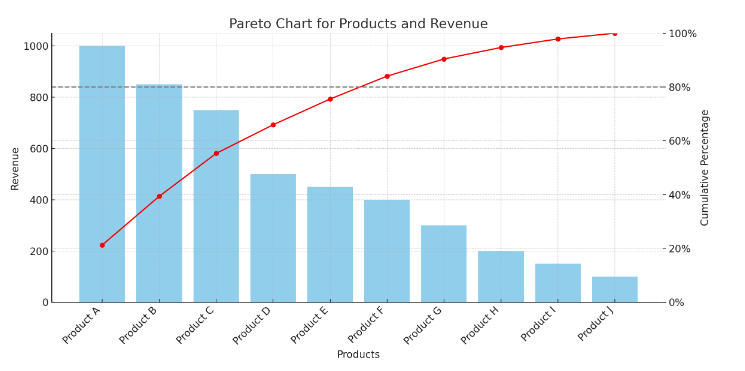

Here is the Pareto chart for products and their corresponding revenues. The chart consists of two key elements:

**Bar Chart:** The blue bars represent the individual revenue contributions of each product, sorted in descending order.

**Line Chart:** The red line shows the cumulative percentage of the total revenue contributed by the products. The horizontal 
gray dashed line indicates the 80% mark.

***Analysis***

- Product Contribution: The first few products (A, B, and C) generate a significant portion of the revenue, highlighting the "vital few" that follow the Pareto Principle.
- Cumulative Percentage: By the time we include Product E, the cumulative revenue reaches around 80% of the total, illustrating that a small number of products contribute to the majority of the revenue.

***Implications***

- Focus on Key Products: Efforts should be concentrated on optimizing and promoting these top-performing products to maximize revenue.
- Resource Allocation: Inventory, marketing, and development resources should be prioritized for these high-impact products to enhance business efficiency and profitability.
- Customer Strategies: Understanding which products are most valued by customers can help in tailoring marketing and customer engagement strategies.


Using Pareto analysis helps businesses identify and focus on the most impactful products, ensuring efficient use of resources and targeted efforts towards driving revenue growth. 

To execute the pareto analysis, you must create the required dataset. There are two levels of Product category in this dataset, use ProdCat2 for this analysis.

***Task 2.2: Create a new dataframe df_Pareto with the columns: ProdCat2, Gross_Turnover, Cumulative_GT, Cumulative_GT%***

*Hint: Cumulative_GT is Cumulative Gross Turnover which you can get by doing a cumulative sum on the Gross Turnover.*



In [64]:
 # Filtering relevant columns for Pareto analysis
df_Pareto = df_Filtered[['ProdCat2','GROSS_TURNOVER']]

# Grouping by 'ProdCat2' and summing 'GROSS_TURNOVER'
df_Pareto = df_Pareto.groupby('ProdCat2').sum().reset_index()

# Sorting the values in descending order
df_Pareto=df_Pareto.sort_values(by='GROSS_TURNOVER', ascending=False)

# Cumulative sum of 'GROSS_TURNOVER'
df_Pareto['Cumulative_GT'] = df_Pareto['GROSS_TURNOVER'].cumsum()

# Cumulative percentage
df_Pareto['Cumulative_GT%'] = (df_Pareto['Cumulative_GT'] / df_Pareto['GROSS_TURNOVER'].sum()) * 100

In [65]:
df_Pareto

,ProdCat2,GROSS_TURNOVER,Cumulative_GT,Cumulative_GT%
21,Carrier Services,6692957.78,6692957.78,6.35
112,Mobile Plans (Prepaid),4874582.07,11567539.85,10.98
200,Wholesale Telecom Services,4787384.44,16354924.29,15.52
106,Mobile Device Management (MDM),3863219.37,20218143.66,19.19
38,Cybersecurity Solutions,3292206.36,23510350.03,22.31
...,...,...,...,...
76,Gaming Analytics Services,1285.79,105370891.28,100.00
169,Shopping Cart Solutions,730.03,105371621.31,100.00
138,Order Management Systems,710.32,105372331.63,100.00
3,5G-Enabled Services,700.83,105373032.46,100.00


***Task 2.3: Arrive at a "Pareto filtered" dataset df_Pareto_80 with the top product categories that contribute to 80% of the Gross Turnover***

*Hint: There are 64 products that contribute to 80% of Gross Revenue turnover*

In [66]:
# Selecting product categories with less than 80% cumulative turnover
eighty=df_Pareto[df_Pareto['Cumulative_GT%'] < 80]
print(eighty['ProdCat2'])

21                              Carrier Services
112                       Mobile Plans (Prepaid)
200                   Wholesale Telecom Services
106               Mobile Device Management (MDM)
38                       Cybersecurity Solutions
64               Enterprise networking equipment
122              Network Infrastructure Services
111                      Mobile Plans (Postpaid)
1                                    4G Services
65             Environmental Monitoring Services
8                   Application Hosting Services
16                    Broadband Internet (Fiber)
48                           Digital ID Services
28                    Cloud and Hosting Services
144                 Platform as a Service (PaaS)
127                             Network switches
113                           Mobile TV Services
141                  Over-the-Top (OTT) Services
2                                    5G Services
197                    Web Conferencing Services
146                 

In [67]:
# Count the number of product categories that contribute to 80%
num_products = eighty['ProdCat2'].nunique()
print(f"Number of product categories that contribute to 80% of the Gross Turnover: {num_products}")

Number of product categories that contribute to 80% of the Gross Turnover: 64


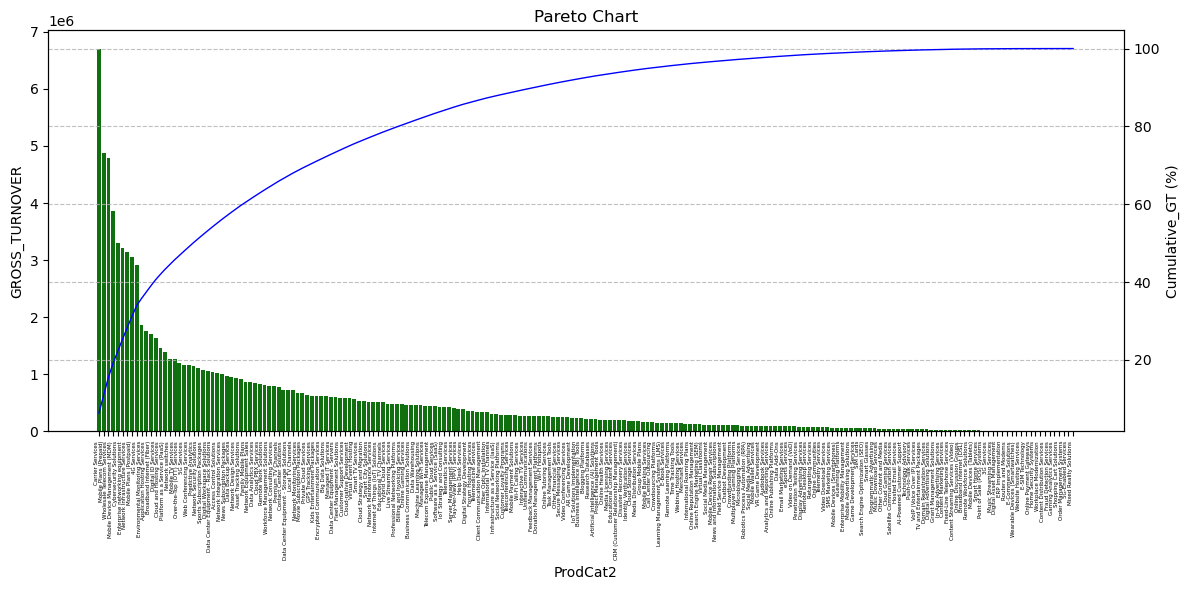

In [68]:
# Initializing a subplot with a 12x6 inches figure
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for turnover
sns.barplot(x='ProdCat2', y='GROSS_TURNOVER', data=df_Pareto, color='green', ax=ax1)

# Setting the y-axis label for the first axis (Turnover)
ax1.set_ylabel('GROSS_TURNOVER', color='black')

# Rotating x-axis labels for readability
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha='right',fontsize=4)

#Creating a second y-axis (twin axis) to plot cumulative percentage
ax2 = ax1.twinx()
ax2.plot(df_Pareto['ProdCat2'], df_Pareto['Cumulative_GT%'], color='blue', linestyle='-', linewidth=1)
ax2.set_ylabel('Cumulative_GT (%)', color='black')

plt.title('Pareto Chart')
plt.grid(axis='y', linestyle='--', alpha=0.8)

plt.tight_layout() 
plt.show()

***Task 2.3: Display the Pareto Chart***

*Hint: Your Pareto Chart will look something like this*

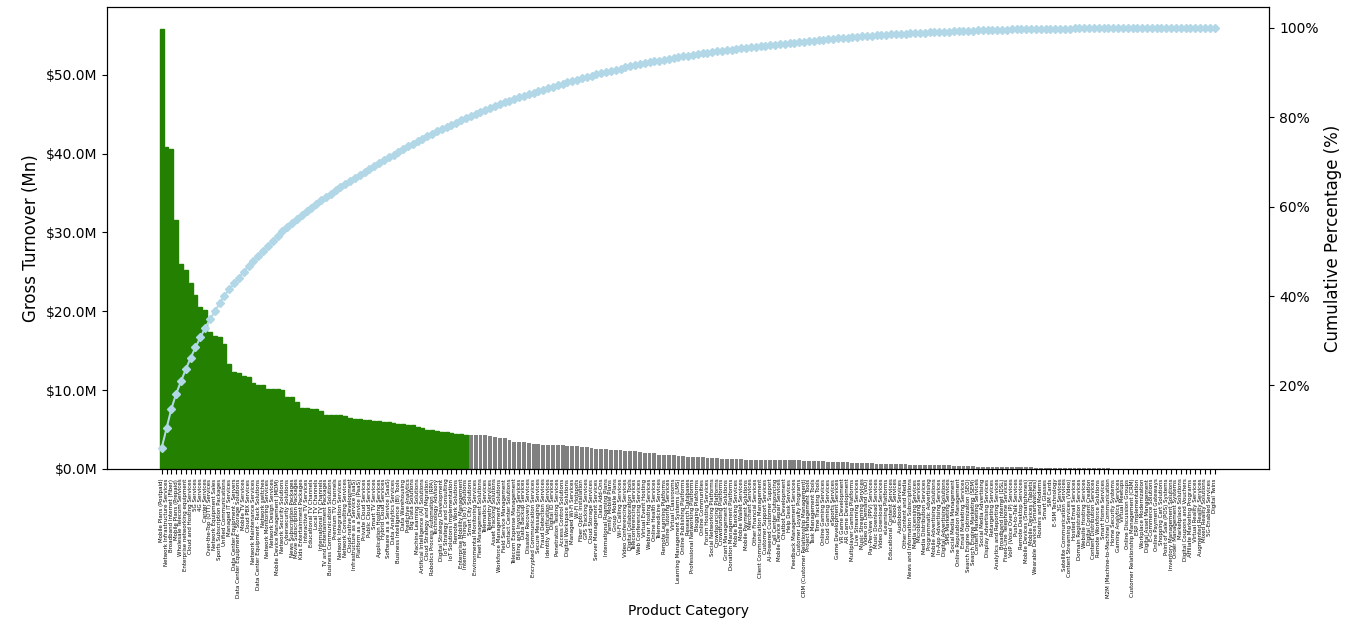


***Task 2.4: Perform the necessary action to map the top products from Pareto Analysis to the previously created master dataframe df_Filtered and store this in a new dataframe df_Filtered_Pareto.***

*Hint: Think Joins?*

In [69]:
# Merging the df_Filtered DataFrame with the 'eighty' DataFrame on the 'ProdCat2' column
df_Filtered_Pareto = df_Filtered.merge(eighty, on="ProdCat2", how="right")

In [70]:
df_Filtered_Pareto

,ProductID,ProductCategoryID,ProdCat2,ProdCat1,Main_account,Customer_type,CUSTOMER_NAME,CUSTOMER_NUMBER,ACCOUNT_GROUP_TXT,CVR_Company_status,...,Main_account_name,Main_resposible_employee_name,Position_type_order_line,GROSS_TURNOVER_x,AMOUNT,Invoice_flag,SKU_flag,GROSS_TURNOVER_y,Cumulative_GT,Cumulative_GT%
0,5733105921,118.00,Carrier Services,Network and Infrastructure,103350,A-B,CUSTOMER_NAME_2958,15082,Debtors,Active,...,Customer Group_24,Responsible Employee_17,ZLAG,2381.46,515,1,1,6692957.78,6692957.78,6.35
1,5733105947,118.00,Carrier Services,Network and Infrastructure,103350,A-B,CUSTOMER_NAME_2958,15082,Debtors,Active,...,Customer Group_24,Responsible Employee_17,ZLAG,2336.46,333,1,1,6692957.78,6692957.78,6.35
2,5733105947,118.00,Carrier Services,Network and Infrastructure,103350,A-B,CUSTOMER_NAME_2958,15082,Debtors,Active,...,Customer Group_24,Responsible Employee_17,ZLAG,1487.64,105,1,1,6692957.78,6692957.78,6.35
3,5732003202,118.00,Carrier Services,Network and Infrastructure,103350,A-B,CUSTOMER_NAME_2958,15082,Debtors,Active,...,Customer Group_24,Responsible Employee_17,ZLAG,626.75,119,1,1,6692957.78,6692957.78,6.35
4,3033778856,118.00,Carrier Services,Network and Infrastructure,103350,A-B,CUSTOMER_NAME_2958,15082,Debtors,Active,...,Customer Group_24,Responsible Employee_17,ZLAG,7058.89,202,1,1,6692957.78,6692957.78,6.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86135,7845150273,560.00,Professional Networking Platforms,Community and Social Platforms,815405,C,CUSTOMER_NAME_1727,815405,Debtors,Active,...,Customer Group_5322,Responsible Employee_10,ZLAG,3408.60,11,1,1,475764.07,84170832.12,79.88
86136,7845150338,560.00,Professional Networking Platforms,Community and Social Platforms,815405,C,CUSTOMER_NAME_1727,815405,Debtors,Active,...,Customer Group_5322,Responsible Employee_10,ZLAG,1269.88,2,1,1,475764.07,84170832.12,79.88
86137,7842207666,560.00,Professional Networking Platforms,Community and Social Platforms,991180,D,CUSTOMER_NAME_5745,991180,Debtors,Active,...,Customer Group_4739,Responsible Employee_8,ZLAG,420.66,7,1,1,475764.07,84170832.12,79.88
86138,7845151586,560.00,Professional Networking Platforms,Community and Social Platforms,413400,A-B,CUSTOMER_NAME_487,413411,Debtors,Active,...,Customer Group_1649,Responsible Employee_1,ZKSK,30888.00,23,1,1,475764.07,84170832.12,79.88


In the above dataset, you will notice that there are some columns that are repititive and redundant.

***Task 2.5: Remove the redundant columns and give a meaningful name to the repititive columns***

In [71]:
print(df_Filtered.columns)

Index(['ProductID', 'ProductCategoryID', 'ProdCat2', 'ProdCat1',
       'Main_account', 'Customer_type', 'CUSTOMER_NAME', 'CUSTOMER_NUMBER',
       'ACCOUNT_GROUP_TXT', 'CVR_Company_status', 'INDEX', 'INVOICE_NUMBER',
       'INVOICE_ITEM', 'DOCUMENT_DATE', 'Main_account_name',
       'Main_resposible_employee_name', 'Position_type_order_line',
       'GROSS_TURNOVER', 'AMOUNT', 'Invoice_flag', 'SKU_flag'],
      dtype='object')


In [72]:
print(df_Filtered_Pareto.columns)

Index(['ProductID', 'ProductCategoryID', 'ProdCat2', 'ProdCat1',
       'Main_account', 'Customer_type', 'CUSTOMER_NAME', 'CUSTOMER_NUMBER',
       'ACCOUNT_GROUP_TXT', 'CVR_Company_status', 'INDEX', 'INVOICE_NUMBER',
       'INVOICE_ITEM', 'DOCUMENT_DATE', 'Main_account_name',
       'Main_resposible_employee_name', 'Position_type_order_line',
       'GROSS_TURNOVER_x', 'AMOUNT', 'Invoice_flag', 'SKU_flag',
       'GROSS_TURNOVER_y', 'Cumulative_GT', 'Cumulative_GT%'],
      dtype='object')


In [73]:
df_Filtered_Pareto = df_Filtered_Pareto.drop(columns=['GROSS_TURNOVER_y', 'Cumulative_GT','Cumulative_GT%','Invoice_flag','SKU_flag'])
df_Filtered_Pareto = df_Filtered_Pareto.rename(columns={'GROSS_TURNOVER_x': 'GROSS_TURNOVER'})
df_Filtered_Pareto

,ProductID,ProductCategoryID,ProdCat2,ProdCat1,Main_account,Customer_type,CUSTOMER_NAME,CUSTOMER_NUMBER,ACCOUNT_GROUP_TXT,CVR_Company_status,INDEX,INVOICE_NUMBER,INVOICE_ITEM,DOCUMENT_DATE,Main_account_name,Main_resposible_employee_name,Position_type_order_line,GROSS_TURNOVER,AMOUNT
0,5733105921,118.00,Carrier Services,Network and Infrastructure,103350,A-B,CUSTOMER_NAME_2958,15082,Debtors,Active,48975,124093712,270,2022-08-23,Customer Group_24,Responsible Employee_17,ZLAG,2381.46,515
1,5733105947,118.00,Carrier Services,Network and Infrastructure,103350,A-B,CUSTOMER_NAME_2958,15082,Debtors,Active,48976,124093712,280,2022-08-23,Customer Group_24,Responsible Employee_17,ZLAG,2336.46,333
2,5733105947,118.00,Carrier Services,Network and Infrastructure,103350,A-B,CUSTOMER_NAME_2958,15082,Debtors,Active,49338,124512640,140,2022-10-28,Customer Group_24,Responsible Employee_17,ZLAG,1487.64,105
3,5732003202,118.00,Carrier Services,Network and Infrastructure,103350,A-B,CUSTOMER_NAME_2958,15082,Debtors,Active,49711,123658470,20,2022-06-13,Customer Group_24,Responsible Employee_17,ZLAG,626.75,119
4,3033778856,118.00,Carrier Services,Network and Infrastructure,103350,A-B,CUSTOMER_NAME_2958,15082,Debtors,Active,49727,123677530,20,2022-06-15,Customer Group_24,Responsible Employee_17,ZLAG,7058.89,202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86135,7845150273,560.00,Professional Networking Platforms,Community and Social Platforms,815405,C,CUSTOMER_NAME_1727,815405,Debtors,Active,1295545,122832063,2800,2022-01-31,Customer Group_5322,Responsible Employee_10,ZLAG,3408.60,11
86136,7845150338,560.00,Professional Networking Platforms,Community and Social Platforms,815405,C,CUSTOMER_NAME_1727,815405,Debtors,Active,1295546,122832063,2600,2022-01-31,Customer Group_5322,Responsible Employee_10,ZLAG,1269.88,2
86137,7842207666,560.00,Professional Networking Platforms,Community and Social Platforms,991180,D,CUSTOMER_NAME_5745,991180,Debtors,Active,1344550,122791443,10,2022-01-25,Customer Group_4739,Responsible Employee_8,ZLAG,420.66,7
86138,7845151586,560.00,Professional Networking Platforms,Community and Social Platforms,413400,A-B,CUSTOMER_NAME_487,413411,Debtors,Active,1185321,124905321,10,2022-12-16,Customer Group_1649,Responsible Employee_1,ZKSK,30888.00,23


**This analysis gives an understanding of the top product portfolio of the company. This will be further used to perform customer segmentation.**

### 3. Customer Segmentation

The next part in this analysis is to find meaningful customer segments from the product purchase behaviour. 

You will use **KMeans Clustering Algorithm** for this.

### KMeans Algorithm 
The KMeans algorithm is a popular clustering technique used to partition a dataset into K clusters, where each data point belongs to the cluster with the nearest mean. Here are the steps involved in the KMeans algorithm:

**Initialization:**

- Choose the optimal number of clusters K, say 3 in this case. 
- Randomly select K data points from the dataset as the initial centroids (cluster centers).

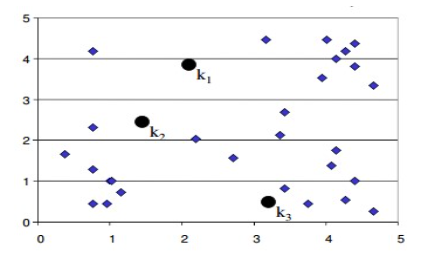

**Assignment Step:**

- Assign each data point to the nearest centroid. This is usually done by calculating the Euclidean distance between each data point and the centroids.
- Each data point is assigned to the cluster whose centroid is closest to it.

**Update Step:**

- Recalculate the centroids as the mean of all data points assigned to each cluster.
- The new centroid for each cluster is the average of the positions of all the data points in that cluster.

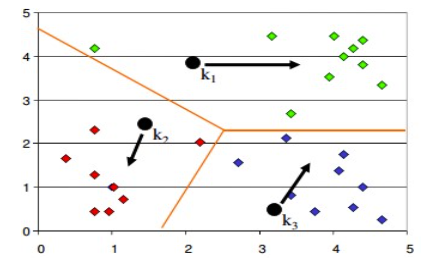

**Repeat:**

- Repeat the Assignment and Update steps until the centroids no longer change significantly or a specified number of iterations is reached.
- This convergence indicates that the clusters are stable, and the algorithm has found the optimal clustering.

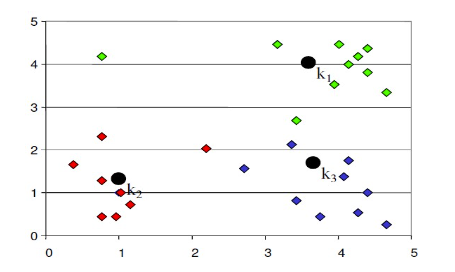

**Termination:**

- The algorithm terminates when the centroids have stabilized (i.e., they do not change significantly between iterations) or after a pre-defined number of iterations.



To execute this analysis, **Main Account** and **ProdCat1** (is a broader product category and is at the highest level in the product hierarchy) data will be used.

*Note: ProdCat2 level data is at a very granular level and performing clustering analysis on this might not give meaningful clusters.*

To proceed with the customer segmentation analysis, you need to menaingfully prepare the data.

***Task 3.1: Transform the data to feed to the clustering algorithm***

- Create a copy of the above dataframe and save it as **df_segment**
- Create a Primary Key: Concatenate the Main Account (ID) and Main Account Name
- Execute a groupby operation to calculate the annual turnover of each customer for each product (ProdCat1)
- Calculate the % spend by each customer across different product categories

The resultant dataframe will have the following columns:
- Primary Key
- ProdCat1
- Gross_Turnover
- Customer Spend %

In [79]:
#Copy and select related data
df_segment = df_Filtered_Pareto[['Main_account','Main_account_name','ProdCat1','GROSS_TURNOVER']]

# Concanate two columns data
df_segment['Primary_Key'] = df_segment['Main_account'].astype(str) + "_" + df_segment['Main_account_name'].astype(str)

#remove unwanted columns
df_segment = df_segment[['Primary_Key','ProdCat1','GROSS_TURNOVER']]

In [80]:
df_segment

,Primary_Key,ProdCat1,GROSS_TURNOVER
0,103350_Customer Group_24,Network and Infrastructure,2381.46
1,103350_Customer Group_24,Network and Infrastructure,2336.46
2,103350_Customer Group_24,Network and Infrastructure,1487.64
3,103350_Customer Group_24,Network and Infrastructure,626.75
4,103350_Customer Group_24,Network and Infrastructure,7058.89
...,...,...,...
86135,815405_Customer Group_5322,Community and Social Platforms,3408.60
86136,815405_Customer Group_5322,Community and Social Platforms,1269.88
86137,991180_Customer Group_4739,Community and Social Platforms,420.66
86138,413400_Customer Group_1649,Community and Social Platforms,30888.00


In [81]:
# Group by df_segment data Primary Key & ProdCat1 (By product and customer)
df_segment = df_segment.groupby(['Primary_Key', 'ProdCat1'])['GROSS_TURNOVER'].sum().reset_index()

# Calculate total gross turnover by each customer/primary key (By customer)
total_spend_per_customer = df_segment.groupby('Primary_Key')['GROSS_TURNOVER'].sum().reset_index()

# Rename column
total_spend_per_customer = total_spend_per_customer.rename(columns={'GROSS_TURNOVER': 'Total Sales per Customer'})

# Merge data
df_segment = df_segment.merge(total_spend_per_customer, on='Primary_Key', how ='left')

#  Calculation of Customer_Spend%
# df_segment['Customer_Spend%'] = (df_segment['GROSS_TURNOVER'] / df_segment['GROSS_TURNOVER'].sum()) * 100
df_segment['Customer_Spend%'] = (df_segment['GROSS_TURNOVER'] / df_segment['Total Sales per Customer']) * 100

df_segment

,Primary_Key,ProdCat1,GROSS_TURNOVER,Total Sales per Customer,Customer_Spend%
0,100027_Customer Group_2392,Broadband and Internet Services,15516.84,47611.28,32.59
1,100027_Customer Group_2392,Data and Analytics,644.18,47611.28,1.35
2,100027_Customer Group_2392,Mobile Services,19020.92,47611.28,39.95
3,100027_Customer Group_2392,Network and Infrastructure,2098.05,47611.28,4.41
4,100027_Customer Group_2392,Television and Entertainment,10331.28,47611.28,21.70
...,...,...,...,...,...
6801,996943_Customer Group_4952,Mobile Services,199.59,1327.91,15.03
6802,999950_Customer Group_4745,IoT and Smart Solutions,568.86,15809.32,3.60
6803,999950_Customer Group_4745,Network and Infrastructure,3899.07,15809.32,24.66
6804,999950_Customer Group_4745,Security and Privacy,65.61,15809.32,0.42


***Task 3.2: Pivot the dataset to create a matrix view of spend % of all customers on all products (ProdCat1). Save the dataframe as df_pivot. Create another dataframe df_clustering removing the primary key from the df_pivot dataframe.***

In [82]:
# Pivot table using Customer_Spend% as values, primary key as rows and ProdCat1 as columns
df_pivot=pd.pivot_table(df_segment, 
                             values='Customer_Spend%',    # Aggregated column
                             index='Primary_Key',   # Rows
                             columns='ProdCat1', # Columns
                             aggfunc='sum',      # Aggregation function
                             fill_value=0).reset_index()
df_pivot

ProdCat1,Primary_Key,Broadband and Internet Services,Business Solutions,Cloud and Hosting Services,Communication Tools,Community and Social Platforms,Customer Support and Management,Data and Analytics,Devices and Accessories,Digital Transformation Services,Gaming and eSports,IoT and Smart Solutions,Mobile Services,Network and Infrastructure,Security and Privacy,Television and Entertainment
0,100027_Customer Group_2392,32.59,0.00,0.00,0.00,0.00,0.00,1.35,0.00,0.00,0.00,0.00,39.95,4.41,0.00,21.70
1,100141_Customer Group_2394,3.38,0.00,2.94,0.00,0.00,0.00,0.00,33.95,35.36,0.00,0.00,15.94,0.00,0.00,8.42
2,10014_Customer Group_198,0.00,1.04,1.26,0.41,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.18,37.75,47.72,3.64
3,100159_Customer Group_556,0.00,0.97,5.85,0.08,1.18,0.02,1.33,0.24,3.40,0.05,1.41,4.69,25.24,41.91,13.63
4,100185_Customer Group_209,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,53.19,0.00,46.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180,996319_Customer Group_5389,0.13,1.63,0.00,0.00,0.00,0.00,28.88,0.00,15.05,0.00,3.67,41.61,6.84,0.00,2.19
1181,996533_Customer Group_4981,18.68,0.00,1.28,0.00,0.00,0.00,0.00,33.20,2.96,0.00,0.00,18.16,0.00,0.00,25.72
1182,996933_Customer Group_1224,0.00,8.94,0.09,7.76,0.00,0.00,0.37,0.27,0.00,0.00,51.66,25.20,1.17,4.32,0.23
1183,996943_Customer Group_4952,0.00,0.00,0.00,84.97,0.00,0.00,0.00,0.00,0.00,0.00,0.00,15.03,0.00,0.00,0.00


In [83]:
# Prepare data for clustering
df_clustering = df_pivot.drop(columns=['Primary_Key'])
df_clustering

ProdCat1,Broadband and Internet Services,Business Solutions,Cloud and Hosting Services,Communication Tools,Community and Social Platforms,Customer Support and Management,Data and Analytics,Devices and Accessories,Digital Transformation Services,Gaming and eSports,IoT and Smart Solutions,Mobile Services,Network and Infrastructure,Security and Privacy,Television and Entertainment
0,32.59,0.00,0.00,0.00,0.00,0.00,1.35,0.00,0.00,0.00,0.00,39.95,4.41,0.00,21.70
1,3.38,0.00,2.94,0.00,0.00,0.00,0.00,33.95,35.36,0.00,0.00,15.94,0.00,0.00,8.42
2,0.00,1.04,1.26,0.41,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.18,37.75,47.72,3.64
3,0.00,0.97,5.85,0.08,1.18,0.02,1.33,0.24,3.40,0.05,1.41,4.69,25.24,41.91,13.63
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,53.19,0.00,46.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180,0.13,1.63,0.00,0.00,0.00,0.00,28.88,0.00,15.05,0.00,3.67,41.61,6.84,0.00,2.19
1181,18.68,0.00,1.28,0.00,0.00,0.00,0.00,33.20,2.96,0.00,0.00,18.16,0.00,0.00,25.72
1182,0.00,8.94,0.09,7.76,0.00,0.00,0.37,0.27,0.00,0.00,51.66,25.20,1.17,4.32,0.23
1183,0.00,0.00,0.00,84.97,0.00,0.00,0.00,0.00,0.00,0.00,0.00,15.03,0.00,0.00,0.00


### The Elbow Method in KMeans Clustering

The Elbow Method is a commonly used technique to determine the optimal number of clusters (K) in KMeans clustering. It helps to balance between underfitting and overfitting by finding a point where adding more clusters doesn’t significantly improve the model performance. 

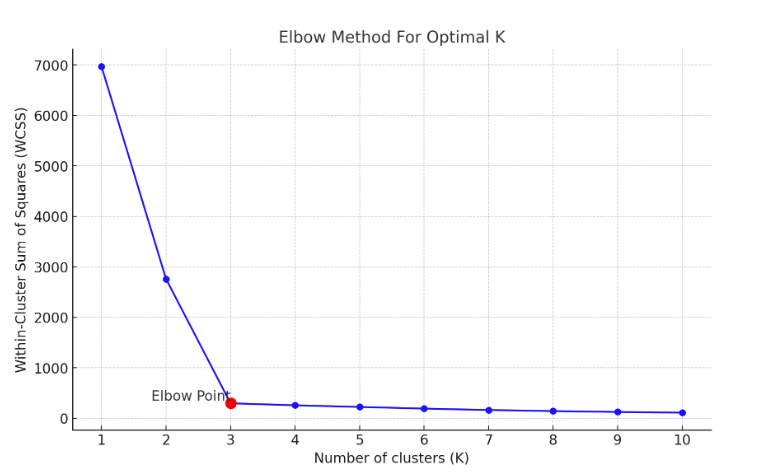

***Explanation of the Plot***

**WCSS (Within Cluster Sum of Squares) vs. Number of Clusters:**

- The x-axis represents the number of clusters (K).
- The y-axis represents the Within-Cluster Sum of Squares (WCSS), which measures the variance within each cluster.

**Plotting WCSS for Different K Values:**

- For each value of K (from 1 to 10), the KMeans algorithm is run, and the corresponding WCSS is calculated.
- The plot shows how WCSS decreases as the number of clusters increases.

**Elbow Point:**

- The red point marked on the plot indicates the "elbow point" where the rate of decrease in WCSS slows down.
- In this example, the elbow point is at K = 3. This suggests that 3 clusters are optimal for this dataset, as adding more clusters beyond this point results in only a marginal reduction in WCSS.

**Interpretation:**

- Before the Elbow Point: Adding more clusters significantly reduces WCSS, indicating that the clusters are becoming more defined and compact.
- After the Elbow Point: The reduction in WCSS slows down, meaning that adding more clusters doesn’t significantly improve the clustering.

**Conclusion** 

The Elbow Method helps to identify the optimal number of clusters by looking for the point where the WCSS starts to decrease at a slower rate, balancing model complexity and performance. In this case, the plot suggests that using 3 clusters is a good choice for the dataset.

***Task 3.3: Run K-Means clustering algorithm and identify the optimal number of clusters using Elbow Method***

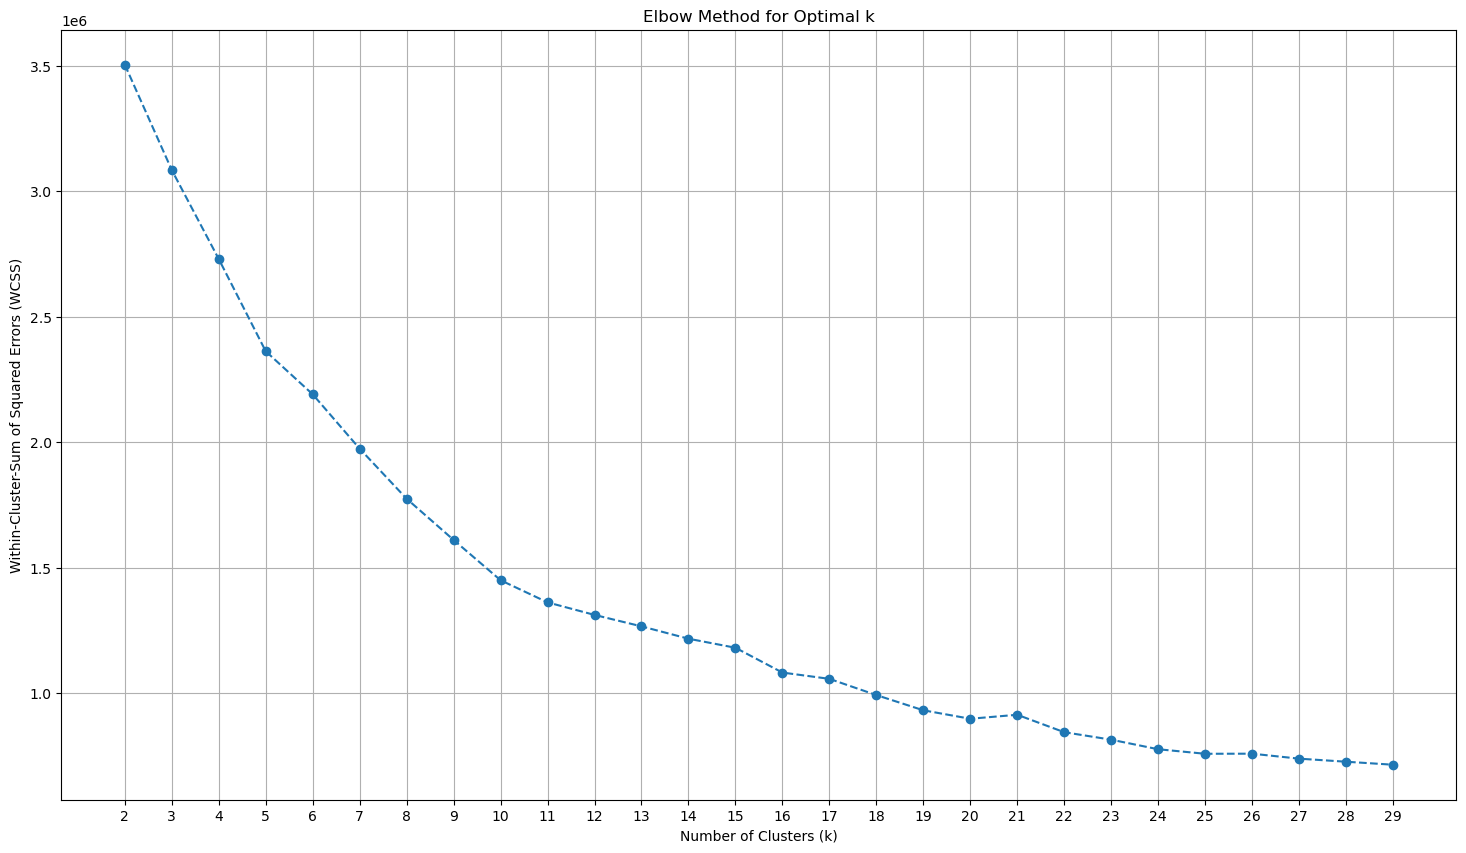

In [84]:
# Initialize an empty list to store Within-Cluster Sum of Squares (WCSS) values
wcss = []

# Define a range of k values to test, starting from 2 up to 39
k_values = range(2, 30)  # Starting from 2 because k must be > 1

# Loop through each k value to perform KMeans clustering
for k in k_values:
    
    # Initialize the KMeans model
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)
    
    # Fit the model to the data
    kmeans.fit(df_clustering)
    
    # Append the WCSS (inertia_) to the list
    wcss.append(kmeans.inertia_)  # inertia_ gives the WCSS

# Plot the Elbow Curve
plt.figure(figsize=(18, 10))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WCSS)')
plt.xticks(k_values)
plt.grid()
plt.show()

The Elbow Curve provides an optimal value for 'k' that is the number of clusters to be generated in the output. This value can be used as a guideline for the actual clustering run; one may vary the number of clusers in the output based on business need.

***Task 3.4: Run the KMeans algorithm with optimal number of clusters***

In [85]:
# Choose based on the elbow method result
optimal_k = 10  

# Apply K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=0, n_init=10, max_iter=3000)
df_clustering['Cluster'] = kmeans.fit_predict(df_clustering)

# View assigned clusters
df_clustering.head(10)

ProdCat1,Broadband and Internet Services,Business Solutions,Cloud and Hosting Services,Communication Tools,Community and Social Platforms,Customer Support and Management,Data and Analytics,Devices and Accessories,Digital Transformation Services,Gaming and eSports,IoT and Smart Solutions,Mobile Services,Network and Infrastructure,Security and Privacy,Television and Entertainment,Cluster
0,32.59,0.00,0.00,0.00,0.00,0.00,1.35,0.00,0.00,0.00,0.00,39.95,4.41,0.00,21.70,2
1,3.38,0.00,2.94,0.00,0.00,0.00,0.00,33.95,35.36,0.00,0.00,15.94,0.00,0.00,8.42,8
2,0.00,1.04,1.26,0.41,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.18,37.75,47.72,3.64,5
3,0.00,0.97,5.85,0.08,1.18,0.02,1.33,0.24,3.40,0.05,1.41,4.69,25.24,41.91,13.63,5
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,53.19,0.00,46.81,6
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,100.00,0
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,100.00,0
7,0.00,5.89,3.31,0.00,0.00,0.00,1.55,0.00,19.46,0.00,0.00,3.58,41.85,24.23,0.14,4
8,0.00,15.49,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.00,0.00,19.23,0.00,64.64,0
9,5.06,0.00,0.00,0.00,0.00,0.00,0.00,13.72,0.00,0.00,0.00,0.00,75.34,0.00,5.87,6


***Task 3.5: From the above clusters, create cluster profile***

***Task 3.5.1: Map each customers to their respective cluster in df_segment dataset***

In [86]:
# Join the clustered data with primary key
df_clustering['Primary_Key'] = df_pivot['Primary_Key']
df_clustering

ProdCat1,Broadband and Internet Services,Business Solutions,Cloud and Hosting Services,Communication Tools,Community and Social Platforms,Customer Support and Management,Data and Analytics,Devices and Accessories,Digital Transformation Services,Gaming and eSports,IoT and Smart Solutions,Mobile Services,Network and Infrastructure,Security and Privacy,Television and Entertainment,Cluster,Primary_Key
0,32.59,0.00,0.00,0.00,0.00,0.00,1.35,0.00,0.00,0.00,0.00,39.95,4.41,0.00,21.70,2,100027_Customer Group_2392
1,3.38,0.00,2.94,0.00,0.00,0.00,0.00,33.95,35.36,0.00,0.00,15.94,0.00,0.00,8.42,8,100141_Customer Group_2394
2,0.00,1.04,1.26,0.41,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.18,37.75,47.72,3.64,5,10014_Customer Group_198
3,0.00,0.97,5.85,0.08,1.18,0.02,1.33,0.24,3.40,0.05,1.41,4.69,25.24,41.91,13.63,5,100159_Customer Group_556
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,53.19,0.00,46.81,6,100185_Customer Group_209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180,0.13,1.63,0.00,0.00,0.00,0.00,28.88,0.00,15.05,0.00,3.67,41.61,6.84,0.00,2.19,2,996319_Customer Group_5389
1181,18.68,0.00,1.28,0.00,0.00,0.00,0.00,33.20,2.96,0.00,0.00,18.16,0.00,0.00,25.72,8,996533_Customer Group_4981
1182,0.00,8.94,0.09,7.76,0.00,0.00,0.37,0.27,0.00,0.00,51.66,25.20,1.17,4.32,0.23,9,996933_Customer Group_1224
1183,0.00,0.00,0.00,84.97,0.00,0.00,0.00,0.00,0.00,0.00,0.00,15.03,0.00,0.00,0.00,4,996943_Customer Group_4952


In [87]:
# Merge clustered data with df_segment
clustered_data = df_segment.merge(df_clustering[['Primary_Key','Cluster']], on = 'Primary_Key',how = 'left' )
clustered_data

,Primary_Key,ProdCat1,GROSS_TURNOVER,Total Sales per Customer,Customer_Spend%,Cluster
0,100027_Customer Group_2392,Broadband and Internet Services,15516.84,47611.28,32.59,2
1,100027_Customer Group_2392,Data and Analytics,644.18,47611.28,1.35,2
2,100027_Customer Group_2392,Mobile Services,19020.92,47611.28,39.95,2
3,100027_Customer Group_2392,Network and Infrastructure,2098.05,47611.28,4.41,2
4,100027_Customer Group_2392,Television and Entertainment,10331.28,47611.28,21.70,2
...,...,...,...,...,...,...
6801,996943_Customer Group_4952,Mobile Services,199.59,1327.91,15.03,4
6802,999950_Customer Group_4745,IoT and Smart Solutions,568.86,15809.32,3.60,0
6803,999950_Customer Group_4745,Network and Infrastructure,3899.07,15809.32,24.66,0
6804,999950_Customer Group_4745,Security and Privacy,65.61,15809.32,0.42,0


***Task 3.5.2: Create a cluster profile table with the cluster label, Gross Turnover for each cluster, Number of unique customers in each cluster, % share of Gross Turnover of each cluster for each product.***

*Illustrative: Here is a snapshot of the desired cluster profile:*
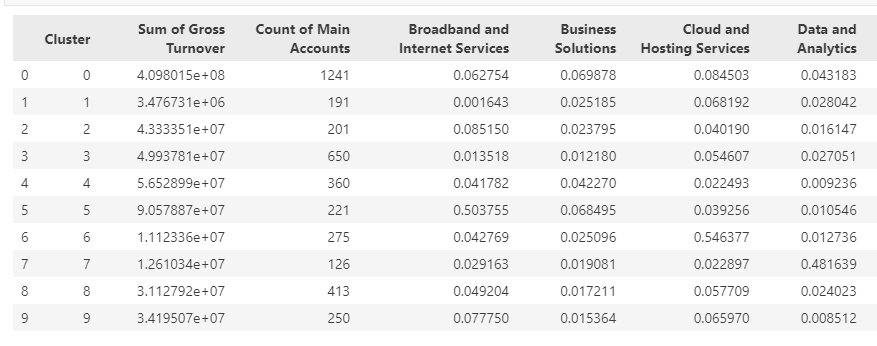

In [89]:
# Step 1: Group by Cluster to summarize total gross turnover and count of accounts
summary = clustered_data.groupby('Cluster').agg(
    Cluster_Gross_Turnover=('GROSS_TURNOVER', 'sum'),
    Count_of_Main_Accounts=('Primary_Key', 'nunique')
).reset_index()

# Step 2: Group by Cluster and Product Category (ProdCat1)
summary1 = clustered_data.groupby(['Cluster', 'ProdCat1']).agg(
    CP_Gross_Turnover=('GROSS_TURNOVER', 'sum')
).reset_index()

# Step 3: Merge both summaries to bring Cluster totals next to category-level turnover
Cust_cluster = summary1.merge(summary, on='Cluster', how='left')

# Step 4: Calculate % contribution of each product category to the cluster total
Cust_cluster['%Gross_Turnover'] = (Cust_cluster['CP_Gross_Turnover'] / Cust_cluster['Cluster_Gross_Turnover']) * 100

# Step 5: Pivot table - Clusters as rows, ProdCat1 as columns, values as %Gross_Turnover
datapivot = Cust_cluster.pivot_table(
    values='%Gross_Turnover',
    index='Cluster',
    columns='ProdCat1',
    aggfunc='sum',
    fill_value=0
).reset_index()


In [90]:
# Step 6: Prepare customer profile by merging datapivot with summary
# Ensure summary only includes the relevant cluster-wide metrics
summary = summary[['Cluster', 'Cluster_Gross_Turnover', 'Count_of_Main_Accounts']]
cust_profile = summary.merge(datapivot, on='Cluster', how='right')

# Step 7: Display the first 10 rows of the final customer profile
cust_profile.head(10)

,Cluster,Cluster_Gross_Turnover,Count_of_Main_Accounts,Broadband and Internet Services,Business Solutions,Cloud and Hosting Services,Communication Tools,Community and Social Platforms,Customer Support and Management,Data and Analytics,Devices and Accessories,Digital Transformation Services,Gaming and eSports,IoT and Smart Solutions,Mobile Services,Network and Infrastructure,Security and Privacy,Television and Entertainment
0,0,2021819.92,117,4.31,2.82,3.33,0.22,0.19,0.69,0.44,6.24,2.87,0.00,0.27,7.90,6.25,0.85,63.62
1,1,4753428.43,44,64.93,1.33,4.07,0.04,0.00,0.09,0.06,2.74,7.64,0.00,0.11,1.73,4.02,0.35,12.89
2,2,4400256.90,124,3.13,1.67,3.44,1.30,0.15,0.28,3.34,4.26,3.13,0.77,1.11,57.34,8.39,3.43,8.26
3,3,1209110.74,54,0.59,62.85,5.62,3.82,0.01,0.13,3.58,1.17,0.58,0.53,0.49,7.23,6.50,3.56,3.31
4,4,45551731.96,359,2.90,5.71,6.82,3.04,0.92,1.13,4.68,7.54,5.02,0.81,5.07,17.35,19.94,9.72,9.35
5,5,4273844.75,111,0.05,2.00,5.52,0.81,0.72,0.11,1.35,1.15,1.75,1.07,1.00,6.18,10.51,60.86,6.93
6,6,13964166.79,191,3.78,1.37,8.74,0.26,0.09,0.07,1.13,1.81,0.74,0.07,0.56,12.30,62.53,1.76,4.78
7,7,1421058.32,50,12.48,2.73,60.33,0.31,0.08,0.03,0.97,0.31,1.19,0.33,0.14,2.31,10.51,2.03,6.26
8,8,4822343.91,70,8.82,1.73,2.14,0.50,0.00,0.33,0.24,53.89,6.11,0.00,0.61,7.61,2.68,0.82,14.53
9,9,1753070.41,65,0.52,8.98,2.19,7.44,0.09,0.25,1.50,2.30,1.26,0.39,53.99,8.01,5.15,6.01,1.92


### 4. Prepare data for Tableau Dashboard

From here, you will be creating the visualizations in Tableau. But before, creating the required visualizations in Tableau, you should prepare the data.

Here is a reference of how data for visualizations for **Customer Segmentation** looks like:

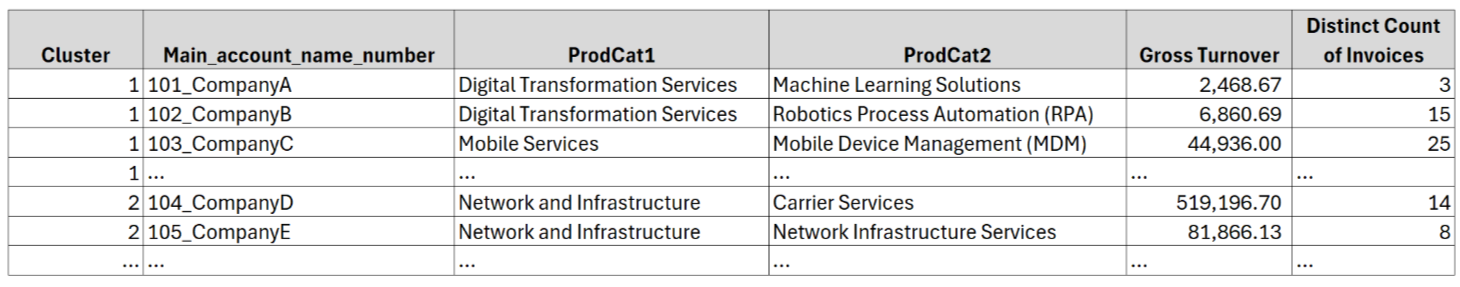






Here is a reference of how data for visualizations for **Product Categorization** looks like:

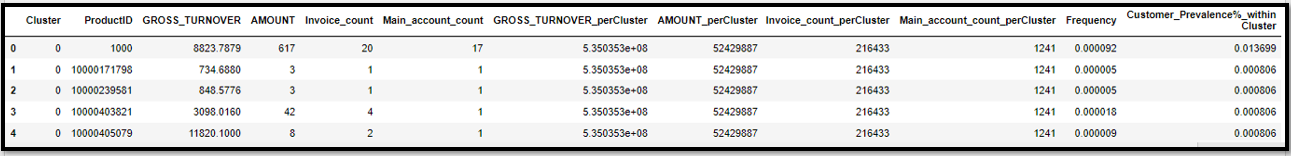

where:

- Product ID: SKU ID
- Gross Turnover (sum), Amount (sum), Invoice_count (distinct count of invoices), Main_account_count (distinct count of main accounts): fields aggregated at SKU level
- Above columns with _percluster: fields aggregated at cluster level
- Frequency (%) : number of transactions the SKU appeared on, when compared to all transactions in a cluster
- Customer Prevalence (%) within cluster : Percentage of customers within a cluster who purchase the SKU



# Customer Segmentation

In [91]:
#Customer Segmentation data
# Selcet relevant data columns
df_cust_segm = df_Filtered_Pareto[['Main_account','Main_account_name','ProdCat1','ProdCat2','GROSS_TURNOVER','INVOICE_NUMBER']]

# Data concanetaion for Primary Key
df_cust_segm['Primary_Key'] = df_cust_segm['Main_account'].astype(str) + "_" + df_cust_segm['Main_account_name'].astype(str)

# Selcet relevant data columns
df_cust_segm = df_cust_segm[['Primary_Key','ProdCat1','ProdCat2','GROSS_TURNOVER','INVOICE_NUMBER']]

# Group by Primary Key, ProdCat1 and ProdCat2
df_cust_segm =  df_cust_segm.groupby(['Primary_Key', 'ProdCat1', 'ProdCat2']).agg({
    'GROSS_TURNOVER': 'sum',       # Sum the values in 'SumColumn'
    'INVOICE_NUMBER': 'nunique'  # Count distinct values in 'DistinctColumn'
}).reset_index()

# Merge Clustered data with df_cust_segment
df_cust_segment = df_cust_segm.merge(clustered_data[['Cluster','Primary_Key']].drop_duplicates(), on = 'Primary_Key',how = 'left' )
df_cust_segment

,Primary_Key,ProdCat1,ProdCat2,GROSS_TURNOVER,INVOICE_NUMBER,Cluster
0,100027_Customer Group_2392,Broadband and Internet Services,4G Services,15516.84,5,2
1,100027_Customer Group_2392,Data and Analytics,Data Analytics Services,81.90,1,2
2,100027_Customer Group_2392,Data and Analytics,Predictive Analytics,562.28,1,2
3,100027_Customer Group_2392,Mobile Services,GPS Tracking Services,2845.80,1,2
4,100027_Customer Group_2392,Mobile Services,Mobile Device Management (MDM),776.31,3,2
...,...,...,...,...,...,...
12072,999950_Customer Group_4745,IoT and Smart Solutions,Environmental Monitoring Services,568.86,1,0
12073,999950_Customer Group_4745,Network and Infrastructure,Network Monitoring Services,2486.57,3,0
12074,999950_Customer Group_4745,Network and Infrastructure,Wholesale Telecom Services,1412.50,1,0
12075,999950_Customer Group_4745,Security and Privacy,Cybersecurity Solutions,65.61,1,0


In [92]:
Cust_cluster

,Cluster,ProdCat1,CP_Gross_Turnover,Cluster_Gross_Turnover,Count_of_Main_Accounts,%Gross_Turnover
0,0,Broadband and Internet Services,87236.99,2021819.92,117,4.31
1,0,Business Solutions,56917.84,2021819.92,117,2.82
2,0,Cloud and Hosting Services,67360.96,2021819.92,117,3.33
3,0,Communication Tools,4529.24,2021819.92,117,0.22
4,0,Community and Social Platforms,3762.38,2021819.92,117,0.19
...,...,...,...,...,...,...
140,9,IoT and Smart Solutions,946531.27,1753070.41,65,53.99
141,9,Mobile Services,140484.41,1753070.41,65,8.01
142,9,Network and Infrastructure,90346.60,1753070.41,65,5.15
143,9,Security and Privacy,105353.53,1753070.41,65,6.01


# Product Categorization

In [94]:
# Product Segmentation data
df_prod = df_Filtered_Pareto[['Main_account','Main_account_name','ProductID','GROSS_TURNOVER','AMOUNT','INVOICE_NUMBER',]]

#Concanate for primary key
df_prod['Primary_Key'] = df_prod['Main_account'].astype(str) + "_" + df_prod['Main_account_name'].astype(str)

In [97]:
# Group by ProductID
df_prod = df_prod.groupby(['ProductID']).agg({
    'GROSS_TURNOVER': 'sum', 
    'AMOUNT': 'sum',
    'INVOICE_NUMBER': 'nunique',
    'Main_account': 'nunique'
}).reset_index()

# Merge with product's detailed information (ProdCat1 & ProdCat2)
df_prod = df_prod.merge(df_Filtered_Pareto[['ProductID','ProdCat1','ProdCat2']].drop_duplicates(), on = 'ProductID',how = 'inner' )

# Rename columns
df_prod = df_prod.rename(columns={
    'INVOICE_NUMBER': 'Invoice_count',
    'Main_account': 'Main_account_count'
})

df_prod

,ProductID,GROSS_TURNOVER,AMOUNT,Invoice_count,Main_account_count,ProdCat1,ProdCat2
0,1000,466.83,23,1,1,Data and Analytics,Data Analytics Services
1,10000086294,15067.88,30,1,1,Network and Infrastructure,Network Infrastructure Services
2,10000171798,734.69,3,1,1,Network and Infrastructure,Wholesale Telecom Services
3,10000263597,696.12,6,1,1,Network and Infrastructure,Wholesale Telecom Services
4,10000403821,3098.02,42,1,1,Customer Support and Management,Customer Support Services
...,...,...,...,...,...,...,...
23453,RIVS2620,10886.87,26,1,1,Mobile Services,Mobile Plans (Postpaid)
23454,RIVS4220,1128.68,2,1,1,Mobile Services,Mobile Plans (Postpaid)
23455,RIVS610,378.89,2,1,1,Mobile Services,Mobile Plans (Postpaid)
23456,RIVS810,348.54,2,1,1,Mobile Services,Mobile Plans (Postpaid)


In [98]:
# %Gross_Turnover calculation
df_prod['%Gross_Turnover'] = (df_prod['GROSS_TURNOVER']/(df_prod['GROSS_TURNOVER'].sum())*100)

# Sort descending
df_prod = df_prod.sort_values(by=['%Gross_Turnover'], ascending=[False])

# Cumulative sum of %Gross_Turnover calculation
df_prod['Cum_%Gross_Turnover'] = df_prod['%Gross_Turnover'].cumsum()

df_prod

,ProductID,GROSS_TURNOVER,AMOUNT,Invoice_count,Main_account_count,ProdCat1,ProdCat2,%Gross_Turnover,Cum_%Gross_Turnover
16312,5733101996,1154840.45,96148,1,1,Network and Infrastructure,Carrier Services,1.37,1.37
19753,7835990100,864082.89,111480,1,1,Network and Infrastructure,Carrier Services,1.03,2.40
16374,5733105976,739366.48,106979,1,1,Network and Infrastructure,Carrier Services,0.88,3.28
16369,5733105918,626607.68,138046,1,1,Network and Infrastructure,Carrier Services,0.74,4.02
19680,7830203818,518765.44,169734,1,1,Cloud and Hosting Services,Data Backup Services,0.62,4.64
...,...,...,...,...,...,...,...,...,...
7886,413111159,1.57,1,1,1,Television and Entertainment,Smart TV Services,0.00,100.00
21865,913083211,1.41,2,1,1,Television and Entertainment,Smart TV Services,0.00,100.00
14083,4454000122,1.30,8,1,1,Devices and Accessories,Network switches,0.00,100.00
18002,747654003,0.86,1,1,1,Mobile Services,Family Mobile Plans,0.00,100.00


In [99]:
# Export to csv files
Cust_cluster.to_csv('Testadata.csv',index=False)
df_prod.to_csv('Product.csv',index=False)

***The End***